In [34]:
#KNN k-nearest neighbors

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from sklearn import metrics

In [36]:
data=pd.read_csv('data.csv')

In [39]:
data=data.drop(['Location','img'],1)

In [40]:
data

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear
0,38.317,48.417,1332.0,6.031665,-45,0,267.981217
1,38.317,48.417,1332.0,6.031665,-35,0,289.396595
2,38.317,48.417,1332.0,6.031665,-25,0,309.203211
3,38.317,48.417,1332.0,6.031665,-15,0,324.975573
4,38.317,48.417,1332.0,6.031665,-5,0,334.305725
...,...,...,...,...,...,...,...
995,30.274,56.951,1748.3,2.498567,-5,90,260.118802
996,30.274,56.951,1748.3,2.498567,5,90,258.581072
997,30.274,56.951,1748.3,2.498567,15,90,258.087367
998,30.274,56.951,1748.3,2.498567,25,90,254.746498


In [41]:
data.describe()

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.004700,51.072400,1092.760000,3.508085,0.000000,45.000000,337.362954
std,3.851903,3.390699,740.292278,1.613040,28.737185,28.737185,60.023406
min,27.218000,46.235000,-12.200000,1.796619,-45.000000,0.000000,164.014553
25%,29.539000,48.417000,20.700000,2.335595,-25.000000,20.000000,293.097438
50%,32.524000,50.838500,1368.700000,3.050507,0.000000,45.000000,343.597690
75%,37.325000,52.589000,1545.900000,4.151495,25.000000,70.000000,385.784373
max,38.317000,56.951000,2049.200000,6.859957,45.000000,90.000000,446.683693


In [84]:
conditions=[
    (data['ACenergyPerYear']<=293),
    (data['ACenergyPerYear']>293) &  (data['ACenergyPerYear']<=343.5),
    (data['ACenergyPerYear']>343.5) & (data['ACenergyPerYear']<=385.7),
    (data['ACenergyPerYear']>385.7)
]
values=[0,1,2,3]
values={0:'worse',1:'bad',2:'good',3:'best'}

In [85]:
data['Condition']=np.select(conditions,values)

In [86]:
data

,Latitude,Longitude,Elevation,Skycover,Orientation,Tilt,ACenergyPerYear,Condition
0,38.317,48.417,1332.0,6.031665,-45,0,267.981217,0
1,38.317,48.417,1332.0,6.031665,-35,0,289.396595,0
2,38.317,48.417,1332.0,6.031665,-25,0,309.203211,1
3,38.317,48.417,1332.0,6.031665,-15,0,324.975573,1
4,38.317,48.417,1332.0,6.031665,-5,0,334.305725,1
...,...,...,...,...,...,...,...,...
995,30.274,56.951,1748.3,2.498567,-5,90,260.118802,0
996,30.274,56.951,1748.3,2.498567,5,90,258.581072,0
997,30.274,56.951,1748.3,2.498567,15,90,258.087367,0
998,30.274,56.951,1748.3,2.498567,25,90,254.746498,0


In [87]:
X=np.array(data.drop(['ACenergyPerYear','Condition'],1))
y=np.array(data['Condition'])

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [89]:
k_range=range(1,50)
score_dict={}
score_list=[]

In [90]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score_dict[k]=metrics.accuracy_score(y_test,y_pred)
    score_list.append(metrics.balanced_accuracy_score(y_test,y_pred))

# Visualization

In [91]:
import matplotlib.pyplot as plt

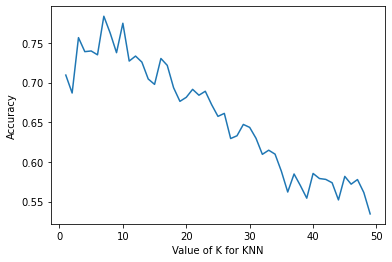

In [92]:
plt.plot(k_range,score_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.savefig('KNNaccuracy.jpg',dpi=300)

# Prediction

In [93]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict([[30.274,56.951,1748.3,2.498567,-5,90]])
y_pred

array([0])

In [95]:
values[y_pred[0]]

'worse'